In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

def convert_number(x):
    try:
        return float(x)
    except ValueError:
        return np.nan
    
converters = defaultdict()
for i in range(1559 -1):
    converters[i] = convert_number
converters[1558] = lambda x:1 if x.strip() == "ad." else 0

ads_data = pd.read_csv("Data/ad.data",header=None,converters=converters)
ads_data

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125.0,125.0,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,57.0,468.0,8.2105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,33.0,230.0,6.9696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170.0,94.0,0.5529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3275,101.0,140.0,1.3861,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3276,23.0,120.0,5.2173,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3277,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [2]:
data = ads_data.dropna(axis=0,how='any')
X = data.drop(1558,axis=1).values
Y = data[1558]
X.shape

(2359, 1558)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier(random_state=14)
score = cross_val_score(dtc, X, Y, scoring='accuracy')
print("准确度是：{}".format(score.mean()))

准确度是：0.9393698945625968


In [4]:
from sklearn.decomposition import PCA
# n_components 表示的组成分的数量
pca = PCA(n_components=5)
Xd = pca.fit_transform(X)

In [5]:
pca.explained_variance_ratio_

array([8.53634788e-01, 1.44730481e-01, 1.03263965e-03, 5.56149224e-05,
       2.74925830e-05])

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier(random_state=14)
score = cross_val_score(dtc, Xd, Y, scoring='accuracy')
print("准确度是：{}".format(score.mean()))

准确度是：0.936405592140775


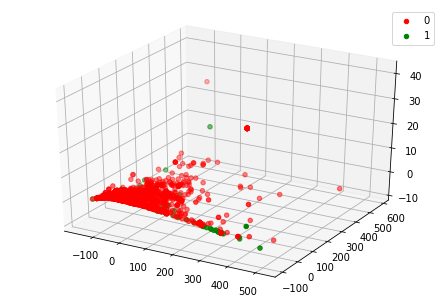

In [15]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
data = ads_data.dropna(axis=0,how='any')
Y = data[1558]
classes = set(Y)
colors = ['red', 'green']
fig = plt.figure()
ax = Axes3D(fig)

for cur_class, color in zip(classes, colors):
    mask = (Y == cur_class).values
    ax.scatter(Xd[mask,0], Xd[mask,1],Xd[mask,2],color=color, label=int(cur_class),marker='o')

plt.legend()
plt.show()